<a href="https://colab.research.google.com/github/SOORAJ-DSML/ML-AND-DL/blob/main/sooraj_ML_Regression_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Insurance Claims Charges Prediction

Download dataset

In [ ]:
!wget https://raw.githubusercontent.com/alexjolly28/entri_DSML/main/resources/insurance.csv

--2023-12-07 14:21:42--  https://raw.githubusercontent.com/alexjolly28/entri_DSML/main/resources/insurance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55628 (54K) [text/plain]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  54.32K  --.-KB/s    in 0.02s   

2023-12-07 14:21:42 (3.37 MB/s) - ‘insurance.csv’ saved [55628/55628]



##STEP-1: Importing Libraries & Data Set

In [ ]:
#import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Read the Data
df=pd.read_csv("insurance.csv")

##STEP-2:Exploratory Data Analysis (EDA)

In [ ]:
# Descriptive stats
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# Null check
df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [ ]:
df.isnull().value_counts()

age    sex    bmi    children  smoker  region  charges
False  False  False  False     False   False   False      1338
dtype: int64

Visulizations

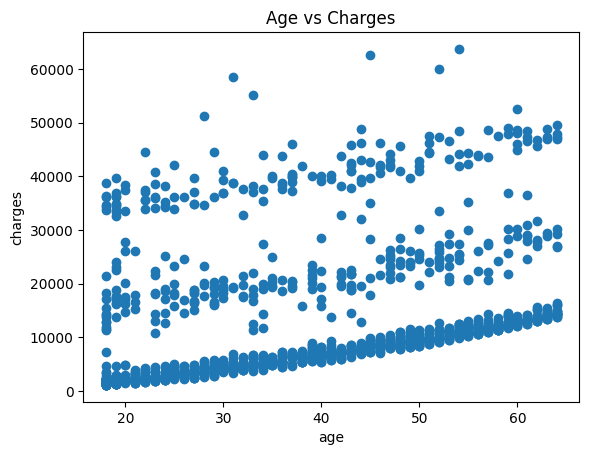

In [ ]:
# Age vs Charges
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df=pd.read_csv('insurance.csv')
x=df['age'].tolist()
y=df['charges'].tolist()
plt.xlabel('age')
plt.ylabel('charges')
plt.title('Age vs Charges')
plt.scatter(x,y)

# the more the age the more will be insurance charge


<BarContainer object of 1338 artists>

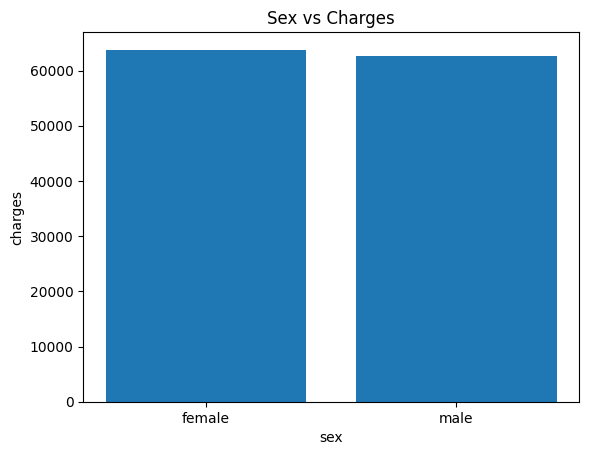

In [ ]:
#sex vs charges
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df=pd.read_csv('insurance.csv')
x=df['sex'].tolist()
y=df['charges'].tolist()
plt.xlabel('sex')
plt.ylabel('charges')
plt.title('Sex vs Charges')
plt.bar(x,y)
# males insurance charges more than females.

<BarContainer object of 1338 artists>

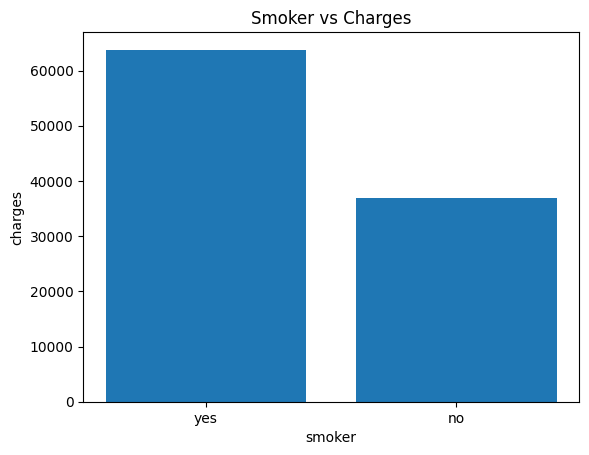

In [ ]:
# smoker vs charges
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df=pd.read_csv('insurance.csv')
x=df['smoker'].tolist()
y=df['charges'].tolist()
plt.xlabel('smoker')
plt.ylabel('charges')
plt.title('Smoker vs Charges')
plt.bar(x,y)
# smokers have more insurance charges than the non smokers

<BarContainer object of 1338 artists>

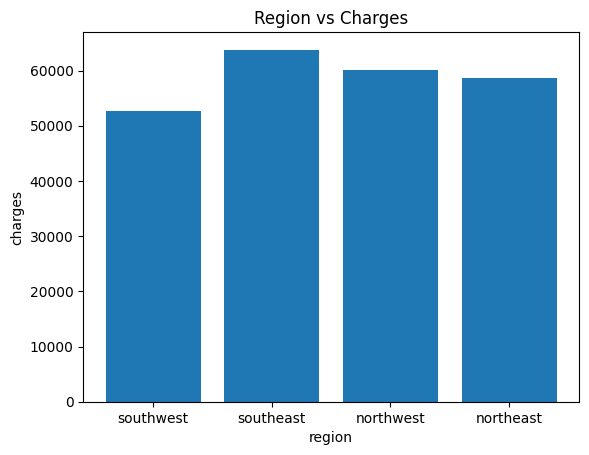

In [ ]:
# region vs charges
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df=pd.read_csv('insurance.csv')
x=df['region'].tolist()
y=df['charges'].tolist()
plt.xlabel('region')
plt.ylabel('charges')
plt.title('Region vs Charges')
plt.bar(x,y)
# region actually does not play any role in determining the insurance charges

<ipython-input-38-07a80d1857db>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=df.corr()


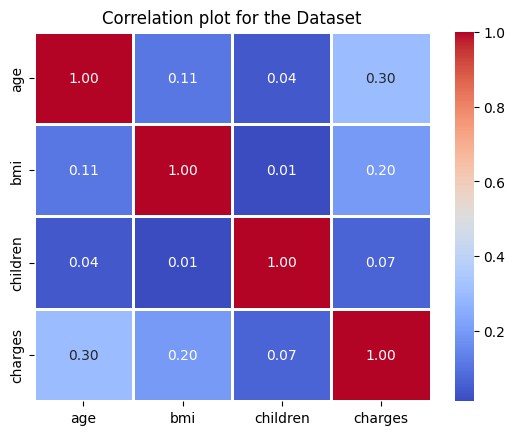

In [ ]:
# plotting the correlation plot for the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f',lw=1)
plt.title('Correlation plot for the Dataset')
plt.show()

##STEP-3:Data Preprocessing / Clean the Data


In [ ]:
#label encoding for sex,smoker and region
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['sex_encoded']=le.fit_transform(df['sex'])
df['smoker_encoded']=le.fit_transform(df['smoker'])
df['region_encoded']=le.fit_transform(df['region'])
df

,age,sex,bmi,children,smoker,region,charges,sex_encoded,smoker_encoded,region_encoded
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,2
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,3


In [ ]:
# removing unnecassary columns from the dataset
x=['sex','smoker','region']
df=df.drop(columns=x)
df

,age,bmi,children,charges,sex_encoded,smoker_encoded,region_encoded
0,19,27.900,0,16884.92400,0,1,3
1,18,33.770,1,1725.55230,1,0,2
2,28,33.000,3,4449.46200,1,0,2
3,33,22.705,0,21984.47061,1,0,1
4,32,28.880,0,3866.85520,1,0,1
...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1
1334,18,31.920,0,2205.98080,0,0,0
1335,18,36.850,0,1629.83350,0,0,2
1336,21,25.800,0,2007.94500,0,0,3


In [ ]:
#Selecting Independent (Features) & Dependent(Target) variables
a=df[['age','bmi','children','sex_encoded','smoker_encoded','region_encoded']]
b=df['charges']
a



,age,bmi,children,sex_encoded,smoker_encoded,region_encoded
0,19,27.900,0,0,1,3
1,18,33.770,1,1,0,2
2,28,33.000,3,1,0,2
3,33,22.705,0,1,0,1
4,32,28.880,0,1,0,1
...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1
1334,18,31.920,0,0,0,0
1335,18,36.850,0,0,0,2
1336,21,25.800,0,0,0,3


In [ ]:
b

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.3,random_state=42)
a_train.shape,a_test.shape,b_train.shape,b_test.shape

((936, 6), (402, 6), (936,), (402,))

##STEP-4 : Fit the Model & Predict , check the Accuracy

##Linear Regression

In [ ]:
# creating the model
# feeding the training data to the model
# predicting the test set results
# calculating the mean squared error
# Calculating the r2 score

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score
a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.1,random_state=42)
model=LinearRegression()
model.fit(a_train,b_train)
b_pred=model.predict(a_test)
MSE= mean_squared_error(b_test,b_pred)
r2=r2_score(b_test,b_pred)
cvs=cross_val_score(model,a,b,cv=4)
MSE,r2,cvs

(32402757.391010426,
 0.7651213280845761,
 array([0.7716605 , 0.71237867, 0.76716437, 0.73494624]))

##Support Vector Machine

In [ ]:
# creating the model
# feeding the training data to the model
# predicting the test set results
# calculating the mean squared error
# Calculating the r2 score
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.1,random_state=42)
scalar=StandardScaler()
a_train_scaled=scalar.fit_transform(a_train)
a_test_scaled=scalar.transform(a_test)
model=SVR(kernel='linear')
model.fit(a_train_scaled,b_train)
b_pred=model.predict(a_test_scaled)
MSE= mean_squared_error(b_test,b_pred)
r2=r2_score(b_test,b_pred)
cvs=cross_val_score(model,scalar.transform(a),b,cv=4)
MSE,r2,cvs

(134411634.53260696,
 0.025687047925164852,
 array([-0.0518804 , -0.0010452 ,  0.02656867, -0.05707836]))

##Decision Tree

In [ ]:
# creating the model
# feeding the training data to the model
# predicting the test set results
# calculating the mean squared error
# Calculating the r2 score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score
a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.1,random_state=42)
model=DecisionTreeRegressor(random_state=42)
model.fit(a_train,b_train)
b_pred=model.predict(a_test)
MSE= mean_squared_error(b_test,b_pred)
r2=r2_score(b_test,b_pred)
cvs=cross_val_score(model,a,b,cv=4)
MSE,r2,cvs


(47576202.8983551,
 0.6551331969468563,
 array([0.72181444, 0.65134118, 0.64878858, 0.70460818]))

##Random Forest

In [ ]:
# creating the model
# feeding the training data to the model
# predicting the test set results
# calculating the mean squared error
# Calculating the r2 score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score
a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.1,random_state=42)
model=RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(a_train,b_train)
b_pred=model.predict(a_test)
MSE= mean_squared_error(b_test,b_pred)
r2=r2_score(b_test,b_pred)
cvs=cross_val_score(model,a,b,cv=4)
MSE,  r2,cvs

(22688995.25074028,
 0.8355337168599201,
 array([0.85721236, 0.78393237, 0.84399505, 0.83053008]))

Compare and evaluate the Model results and find the best model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
Model=[('Linear Regression',LinearRegression()),('Support vector mechiene',SVR(kernel='linear')),('Decision Tree',DecisionTreeRegressor(random_state=42)),
       ('Random Forest',RandomForestRegressor(n_estimators=100,random_state=42))]
for model_name,model in Model:
  csv=cross_val_score(model,a,b,cv=4,scoring='neg_mean_squared_error')
  avg_MSE=-csv.mean()
  print(f"avarage MSE in {model_name}:{avg_MSE}")


avarage MSE in Linear Regression:36907613.29400496
avarage MSE in Support vector mechiene:166624034.62972063
avarage MSE in Decision Tree:46106197.741385706
avarage MSE in Random Forest:24775667.991140407
